In [1]:
# Dependencies
import pandas as pd

In [2]:
# Import datasets
summer_raw = pd.read_csv("Resources/summer.csv")
winter_raw = pd.read_csv("Resources/winter.csv")

In [3]:
# Summarise Dataset for Events

print("Summer")
years = summer_raw["Year"].nunique()
print(f"number of unique years = {years}")
events = summer_raw["Event"].nunique()
print(f"number of unique events = {events}")
print("-------------------------------------")
print("Winter")
years = winter_raw["Year"].nunique()
print(f"number of unique years = {years}")
events = winter_raw["Event"].nunique()
print(f"number of unique events = {events}")
first_games = summer_raw["Year"].min()
print("-------------------------------------")
print(f"The first Olympic Games was held in {first_games}")
print("-------------------------------------")
first_olympics = summer_raw.loc[summer_raw["Year"] == 1896]
print("1896 Olympic Games")
events = first_olympics["Event"].nunique()
print(f"number of unique events = {events}")
added_events = summer_raw["Event"].nunique()- first_olympics["Event"].nunique()
print(f"number of added events since the first Olympic Games = {added_events}")

Summer
number of unique years = 27
number of unique events = 666
-------------------------------------
Winter
number of unique years = 22
number of unique events = 83
-------------------------------------
The first Olympic Games was held in 1896
-------------------------------------
1896 Olympic Games
number of unique events = 43
number of added events since the first Olympic Games = 623


In [4]:
# Get list of unique countries
Countries = summer_raw.drop_duplicates(subset=["Country"], keep='first')
Countries = Countries["Country"]

# Identify the top performers overall
# divide by medal
gold_medalists = summer_raw.loc[summer_raw["Medal"] == "Gold"]
silver_medalists = summer_raw.loc[summer_raw["Medal"] == "Silver"]
bronze_medalists = summer_raw.loc[summer_raw["Medal"] == "Bronze"]

# divide data into Men and Women
gold_men = gold_medalists.loc[gold_medalists["Gender"] == "Men"]
gold_women = gold_medalists.loc[gold_medalists["Gender"] == "Women"]
silver_men = silver_medalists.loc[silver_medalists["Gender"] == "Men"]
silver_women = silver_medalists.loc[silver_medalists["Gender"] == "Women"]
bronze_men = bronze_medalists.loc[bronze_medalists["Gender"] == "Men"]
bronze_women = bronze_medalists.loc[bronze_medalists["Gender"] == "Women"]

# remove duplicates for instances where multiple gold medals were awarded for team sports
unique_events_men_gold = gold_men.drop_duplicates(subset=["Event","Year","Country"], keep='first')
unique_events_women_gold = gold_women.drop_duplicates(subset=["Event","Year","Country"], keep='first')
unique_events_men_silver = silver_men.drop_duplicates(subset=["Event","Year","Country"], keep='first')
unique_events_women_silver = silver_women.drop_duplicates(subset=["Event","Year","Country"], keep='first')
unique_events_men_bronze = bronze_men.drop_duplicates(subset=["Event","Year","Country"], keep='first')
unique_events_women_bronze = bronze_women.drop_duplicates(subset=["Event","Year","Country"], keep='first')

# combine the men and women dataframes
unique_events_men_gold.append(unique_events_women_gold)
unique_events_men_silver.append(unique_events_women_silver)
unique_events_men_bronze.append(unique_events_women_bronze)

unique_events_gold = unique_events_men_gold
unique_events_silver = unique_events_men_silver
unique_events_bronze = unique_events_men_bronze

# compute medal count by country as series
unique_events_gold = unique_events_gold['Country'].groupby([unique_events_gold['Country']]).count()
unique_events_silver = unique_events_silver['Country'].groupby([unique_events_silver['Country']]).count()
unique_events_bronze = unique_events_bronze['Country'].groupby([unique_events_bronze['Country']]).count()

In [5]:
# .DataFrame is a constructor

# create a dictionary
ex_dict = {
    'Country': Countries,
    'gold_medalists': unique_events_gold,
    'silver_medalists': unique_events_silver,
    'bronze_medalists': unique_events_bronze
    
}

# create a list of strings
columns = ['Country',"gold_medalists", "silver_medalists", "bronze_medalists"]


# Passing a dictionary
# key: column name
# value: series of values
total_medals = pd.DataFrame(ex_dict, columns=columns)

In [6]:
# drop rows wil null values
total_medals.dropna(subset=["gold_medalists", "silver_medalists", "bronze_medalists"], inplace=True)
# replace missing values with zero
total_medals.fillna(0)
# reset axis and index
total_medals = total_medals.drop("Country",axis=1)
total_medals.reset_index(inplace=True)
total_medals = total_medals.rename(columns = {'index':'Country'})
# display final dataframe
total_medals
# add totals column
total_medals["Total Medals"] = total_medals["gold_medalists"] + total_medals["silver_medalists"] + total_medals["bronze_medalists"]
#sort dataframe
all_events_medal_count = total_medals.sort_values(by='gold_medalists',ascending=False)
# display df
all_events_medal_count.head()

,Country,gold_medalists,silver_medalists,bronze_medalists,Total Medals
78,USA,730.0,566.0,485.0,1781.0
76,URS,283.0,234.0,201.0,718.0
30,GBR,195.0,212.0,203.0,610.0
40,ITA,172.0,140.0,159.0,471.0
28,FRA,171.0,186.0,202.0,559.0


In [7]:
# remove inaugural games
subsequent_games = summer_raw[summer_raw.Year != 1896]

In [9]:
# separate by medal
gold_medalists = subsequent_games.loc[subsequent_games["Medal"] == "Gold"]
silver_medalists = subsequent_games.loc[subsequent_games["Medal"] == "Silver"]
bronze_medalists = subsequent_games.loc[subsequent_games["Medal"] == "Bronze"]

# divide data into Men and Women

gold_men = gold_medalists.loc[gold_medalists["Gender"] == "Men"]
gold_women = gold_medalists.loc[gold_medalists["Gender"] == "Women"]
silver_men = silver_medalists.loc[silver_medalists["Gender"] == "Men"]
silver_women = silver_medalists.loc[silver_medalists["Gender"] == "Women"]
bronze_men = bronze_medalists.loc[bronze_medalists["Gender"] == "Men"]
bronze_women = bronze_medalists.loc[bronze_medalists["Gender"] == "Women"]

# remove duplicates for instances where multiple gold medals were awarded for team sports
# keeping first row as unique identifies the year that each event was introduced

unique_events_men_gold = gold_men.drop_duplicates(subset=["Event"], keep='first')
unique_events_women_gold = gold_women.drop_duplicates(subset=["Event"], keep='first')
unique_events_men_silver = silver_men.drop_duplicates(subset=["Event"], keep='first')
unique_events_women_silver = silver_women.drop_duplicates(subset=["Event"], keep='first')
unique_events_men_bronze = bronze_men.drop_duplicates(subset=["Event"], keep='first')
unique_events_women_bronze = bronze_women.drop_duplicates(subset=["Event"], keep='first')

In [10]:
# check data for duplicate event values

print(unique_events_men_gold["Event"].value_counts())

print("-----------------------------------------")

print(unique_events_women_gold["Event"].value_counts())

print("-----------------------------------------")

print(unique_events_men_silver["Event"].value_counts())

print("-----------------------------------------")

print(unique_events_women_silver["Event"].value_counts())

print("-----------------------------------------")

print(unique_events_men_gold["Event"].value_counts())

print("-----------------------------------------")

print(unique_events_women_gold["Event"].value_counts())

Synchronized 10M                             1
Open Class                                   1
- 50.8KG (Flyweight)                         1
57 - 63KG (Featherweight)                    1
200M Backstroke                              1
                                            ..
61 - 66KG (Lightweight)                      1
10000M Walk                                  1
25Y Small Bore Rifle, Disappearing Target    1
57 - 61KG (Featherweight)                    1
Individual 1 Ball                            1
Name: Event, Length: 578, dtype: int64
-----------------------------------------
Skeet (125 Targets)             1
Volleyball                      1
57 - 67 KG                      1
Individual                      1
57 - 63KG                       1
                               ..
Team Sprint                     1
Javelin Throw                   1
66 - 72KG (Half-Heavyweight)    1
4X100M Freestyle                1
75 KG                           1
Name: Event, Length: 206, dt

In [11]:
# compute medal count by country as series

women_gold_count = unique_events_women_gold['Country'].groupby([unique_events_women_gold['Country']]).count()
women_silver_count = unique_events_women_silver['Country'].groupby([unique_events_women_silver['Country']]).count()
women_bronze_count = unique_events_women_bronze['Country'].groupby([unique_events_women_bronze['Country']]).count()

men_gold_count = unique_events_men_gold['Country'].groupby([unique_events_men_gold['Country']]).count()
men_silver_count = unique_events_men_silver['Country'].groupby([unique_events_men_silver['Country']]).count()
men_bronze_count = unique_events_men_bronze['Country'].groupby([unique_events_men_bronze['Country']]).count()

In [12]:
# .DataFrame is a constructor

# create a dictionary
ex_dict = {
    'Country': Countries,
    'Gold Count Men': men_gold_count,
    'Silver Count Men': men_silver_count,
    'Bronze Count Men': men_bronze_count
    
}

# create a list of strings
columns = ['Country',"Gold Count Men", "Silver Count Men", "Bronze Count Men"]


# Passing a dictionary
# key: column name
# value: series of values
medal_counts_men = pd.DataFrame(ex_dict, columns=columns)

In [13]:
# drop rows wil null values
medal_counts_men.dropna(subset=["Gold Count Men", "Silver Count Men", "Bronze Count Men"], inplace=True)
# replace missing values with zero
medal_counts_men.fillna(0)
# reset axis and index
medal_counts_men = medal_counts_men.drop("Country",axis=1)
medal_counts_men.reset_index(inplace=True)
medal_counts_men = medal_counts_men.rename(columns = {'index':'Country'})
# display final dataframe
medal_counts_men["Total"] = medal_counts_men["Gold Count Men"] + medal_counts_men["Silver Count Men"] + medal_counts_men["Bronze Count Men"]
#sort dataframe
medal_counts_men = medal_counts_men.sort_values(by='Gold Count Men',ascending=False)
# display df
medal_counts_men.head()

,Country,Gold Count Men,Silver Count Men,Bronze Count Men,Total
41,USA,121.0,101.0,99.0,321.0
17,GBR,70.0,61.0,47.0,178.0
15,FRA,50.0,55.0,50.0,155.0
36,SWE,25.0,27.0,29.0,81.0
40,URS,21.0,13.0,9.0,43.0


In [14]:
ex_dict = {
    'Country': Countries,
    'Gold Count Women': women_gold_count,
    'Silver Count Women': women_silver_count,
    'Bronze Count Women': women_bronze_count
    
}

# create a list of strings
columns = ['Country',"Gold Count Women", "Silver Count Women", "Bronze Count Women"]


# Passing a dictionary
# key: column name
# value: series of values
medal_counts_women = pd.DataFrame(ex_dict, columns=columns)
medal_counts_women.head()

,Country,Gold Count Women,Silver Count Women,Bronze Count Women
0,HUN,NaN,NaN,NaN
1,AUT,NaN,NaN,NaN
2,GRE,NaN,NaN,NaN
11,USA,NaN,NaN,NaN
14,GER,NaN,NaN,NaN


In [15]:
# drop rows wil null values
medal_counts_women.dropna(subset=["Gold Count Women", "Silver Count Women", "Bronze Count Women"], inplace=True)
# replace missing values with zero
medal_counts_women.fillna(0)
# reset axis and index
medal_counts_women = medal_counts_women.drop("Country",axis=1)
medal_counts_women.reset_index(inplace=True)
medal_counts_women = medal_counts_women.rename(columns = {'index':'Country'})
# add totals column
medal_counts_women["Totals"] = medal_counts_women["Gold Count Women"] + medal_counts_women["Silver Count Women"] + medal_counts_women["Bronze Count Women"]
#sort dataframe
medal_counts_women = medal_counts_women.sort_values(by='Gold Count Women',ascending=False)
# display df
medal_counts_women.head()

,Country,Gold Count Women,Silver Count Women,Bronze Count Women,Totals
28,USA,42.0,33.0,34.0,109.0
5,CHN,25.0,18.0,10.0,53.0
11,GBR,18.0,18.0,11.0,47.0
10,FRA,11.0,7.0,7.0,25.0
27,URS,11.0,12.0,10.0,33.0


In [16]:
new_events = pd.merge(medal_counts_men,medal_counts_women,on="Country",how="left").fillna(0)

In [17]:
new_events['Total Gold'] = new_events['Gold Count Men'] + new_events['Gold Count Women']
new_events['Total Silver'] = new_events['Silver Count Men'] + new_events['Silver Count Women']
new_events['Total Bronze'] = new_events['Bronze Count Men'] + new_events['Bronze Count Women']
new_events["Total Medals"] = new_events["Total Gold"]  + new_events["Total Silver"]  + new_events["Total Bronze"] 

In [18]:
new_events_medal_count = new_events

In [19]:
new_events_medal_count.head()

,Country,Gold Count Men,Silver Count Men,Bronze Count Men,Total,Gold Count Women,Silver Count Women,Bronze Count Women,Totals,Total Gold,Total Silver,Total Bronze,Total Medals
0,USA,121.0,101.0,99.0,321.0,42.0,33.0,34.0,109.0,163.0,134.0,133.0,430.0
1,GBR,70.0,61.0,47.0,178.0,18.0,18.0,11.0,47.0,88.0,79.0,58.0,225.0
2,FRA,50.0,55.0,50.0,155.0,11.0,7.0,7.0,25.0,61.0,62.0,57.0,180.0
3,SWE,25.0,27.0,29.0,81.0,2.0,4.0,5.0,11.0,27.0,31.0,34.0,92.0
4,URS,21.0,13.0,9.0,43.0,11.0,12.0,10.0,33.0,32.0,25.0,19.0,76.0


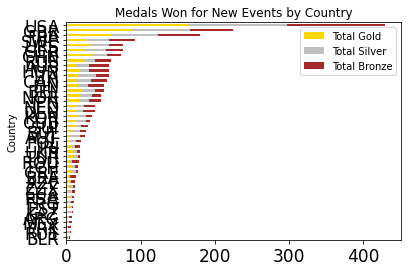

In [25]:
import matplotlib.pyplot as plt

new_events_medal_count = new_events_medal_count.sort_values("Total Medals", ascending=True)

df1 = pd.DataFrame(new_events_medal_count.drop(["Gold Count Men",
                                              "Silver Count Men",
                                              "Bronze Count Men",
                                              "Gold Count Women",
                                              "Silver Count Women",
                                              "Bronze Count Women",
                                               "Totals",
                                               "Total Medals","Total"],
                                              axis=1))

df1 = df1.set_index("Country")

ax = df1.plot.barh(color={"Total Gold": "gold", "Total Silver": "silver", "Total Bronze": "brown"},stacked=True)
ax.set_title("Medals Won for New Events by Country")
plt.tick_params(axis='x', labelsize=17)
plt.tick_params(axis='y', labelsize=17)
plt.show()

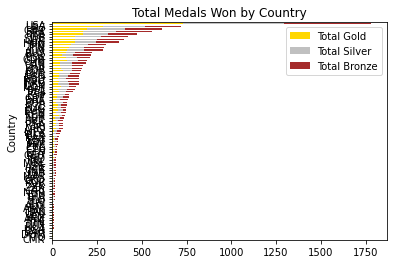

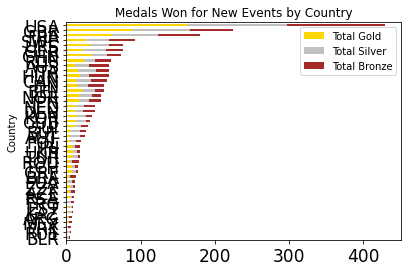

In [27]:

total_medals.rename(columns = {"gold_medalists" : "Total Gold",
                               "silver_medalists" : "Total Silver",
                               "bronze_medalists" : "Total Bronze"}, inplace="True")

total_medals = total_medals.sort_values("Total Medals", ascending=True)

df2 = pd.DataFrame(total_medals.drop(["Total Medals"],axis=1))

df2 = df2.set_index("Country")

ax2 = df2.plot.barh(color={"Total Gold": "gold", "Total Silver": "silver", "Total Bronze": "brown"},stacked=True)
ax1 = df1.plot.barh(color={"Total Gold": "gold", "Total Silver": "silver", "Total Bronze": "brown"},stacked=True)

ax1.set_title("Medals Won for New Events by Country")
ax2.set_title("Total Medals Won by Country")

plt.tick_params(axis='x', labelsize=17)
plt.tick_params(axis='y', labelsize=17)


In [161]:
pd.set_option('display.max_rows', None)

USA = unique_events_men_gold.loc[unique_events_men_gold["Country"] == "USA"]

USA

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
231,1900,Paris,Athletics,Athletics,"JARVIS, Francis",USA,Men,100M,Gold
234,1900,Paris,Athletics,Athletics,"KRAENZLEIN, Alvin",USA,Men,110M Hurdles,Gold
240,1900,Paris,Athletics,Athletics,"TEWKSBURY, Walter B. John",USA,Men,200M,Gold
243,1900,Paris,Athletics,Athletics,"KRAENZLEIN, Alvin",USA,Men,200M Hurdles,Gold
252,1900,Paris,Athletics,Athletics,"LONG, Maxwell W.Maxey",USA,Men,400M,Gold
255,1900,Paris,Athletics,Athletics,"TEWKSBURY, Walter B. John",USA,Men,400M Hurdles,Gold
268,1900,Paris,Athletics,Athletics,"KRAENZLEIN, Alvin",USA,Men,60M,Gold
277,1900,Paris,Athletics,Athletics,"FLANAGAN, John Jesus",USA,Men,Hammer Throw,Gold
280,1900,Paris,Athletics,Athletics,"BAXTER, Irving",USA,Men,High Jump,Gold
283,1900,Paris,Athletics,Athletics,"EWRY, Ray",USA,Men,"High Jump, Standing",Gold


In [ ]:
# areas of interest: 
# analyse the emergence of major communist states such as Russia and China
# Investigate the discilpines where USA has benefited the most from new events
# Investigate the discilpines where SWE has benefited the most from new events
# Do we want to combine URS and RUS? 

# issues to fix: 

#use melt function to create new medal colour columns and then use barchart i pandas